# Procesamiento de Histograma 

Sea $r_k$ la intensidad de la imagen digital de nivel $L$ , $f(x)$. El histograma no normalizado de f esta definido como

$$h(r_k) = n_k , k = 0, 1, ... ,L-1$$ 

donde $n_k$ es el número de pixeles en $f$ con intensidad $r_k$, y las particiones de la escala de instensidad es llamada *histogram bins*. Similarmente, el histograma normalizado de $f$ esta definido como $$p(r_k) = \frac{h(r_k)}{MN} = \frac{n_k}{MN}$$

Donde M y N son el número de filas y columnas de la imagen, respectivamente.

Cuando se trabaja con histograma normalizados, se refiere simplemente como *histogramas* o *histogramas de imagen*. La suma de $p(r_k)$ (PDF) para todo los valores de l es siempre 1. Este viene hacer la probabilidad de nivel de intensidad que ocurre en una imagen.

![4 tipos de imagenes](./imagenes/Figura3_16.png)

## Ecualización de Histrograma

Sea la variable $r$ que denota las intensidades de una imagen para ser procesada. Asumiremos que r esta en el rango $[0, L -1]$, con $r = 0$ que representa negro y $r = L-1$ representa blanco.

$$ s = T(r) , 0 < r < L-1$$

Para satisfacer estas condiciones, centramos la atención en las transformaciones (mapeos de intensidad) de la forma que produce un valor de intensidad de salida, s, para un valor de intensidad dado r en la imagen de entrada. Asumimos que

(a) $T(r)$ es una función monotónica creciente en el intervalo $0<r<L-1$

(b) $0<T(r)<L-1$ para $0<r<L-1$

Un resultado fundamental de la teoría de probabilidad es que si $p_r(r)$ y $T(r)$ son conocidos, y $T(r)$ es continuo y diferenciable en el rango de valores de interés, entonces el $PDF$ de las variables transformadas (mapeadas) se puede obtener como

$$p_s(s) = p_r(r) |\frac{dr}{ds} |$$

Recuerde que $r$ y $s$ estan relacionado por $T(r)$

Una función de transformación en el procesamiento de imágenes es $$s = T(r) = (L-1)\int_0^r{p_r(w)}dw$$ Ecuación 3-11

La integral del lado derecho es la función de distribución acumulada (CDF) de la variable aleatorio $r$. Esta función cumple con las 2 condiciones mencionadas anteriormente.

Por regla de Leibniz dice que la derivada de una integral definida con respecto a su limite superior es la integral evaluada en el límite. Esto es:

$$\frac{ds}{dr} = \frac{dT(r)}{dr}$$

$$ {} = (L-1)\frac{d[\int_0^r{p_r(w)dw}]}{dr} $$

$${} = (L-1) p_r(r)$$

![Probabilidad de p(r) y p(s)](./imagenes/Figura3_18.png)

Sustituyendo el resultado de $\frac{dr}{ds}$ en la Ecuación 3-10

$$p_s(s) = p_r(r)|\frac{dr}{ds}|$$

$$= p_r(r)|\frac{1}{(L-1)p_r(r)}|$$

$$ = \frac{1}{L-1}, 0 < s < L-1 $$

Para valores discretos, trabajamos con probabilidades y sumas en lugar de funciones e integrales de densidad de probabilidad (pero el requisito de monotonicidad establecido anteriormente aún se aplica)

La forma discreta de la transformación es : $$s_k = T(r_k) = (L-1) \sum_{j=0}^k{p_r(r_j)}$$ donde $L$ es el número de niveles de intensidad posibles en la imagen.

En valores discreto se dice ecualización de histograma o transformación de linealización de histograma. 

**El resultado neto es la mejora del contraste**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def CDF(img):

    imagen = np.zeros(256)
    acum = 0 
    for i in range(0,256):
        imagen[i] = sum(img[0:i+1])

    return imagen


def PDF(img):
    imagen = np.zeros(256)    

    for i in img:
        imagen[i] += 1
    
    return imagen/(len(img))

#img = cv2.imread("img/tomografia.png",0)
#img = cv2.imread("img/ciudad.png",0)
#img = cv2.imread("img/figura3_26.png",0)
img = cv2.imread("img/nueces.png",0)
img_realizada = img.copy()
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,4))
img_nelson = img.copy()
axs[0].set_title("Función r")
axs[0].set_ylabel('Intensidad')
axs[0].set_xlabel('r')
axs[0].plot(list(map(int,np.linspace(0,255,256))), PDF(img.flatten()))

s = 255*CDF(PDF(img.flatten()))
axs[1].set_title("Función s")
axs[1].set_ylabel('T(r) = s')
axs[1].set_xlabel('r')
axs[1].plot(list(map(int,np.linspace(0,255,256))), s)

p_s = PDF(img.flatten())*CDF(PDF(img.flatten()))

axs[2].set_title(r"Probabilidad - $P(s)$")
axs[2].set_xlabel('r')
axs[2].set_ylabel('Probabilidad')
axs[2].plot(list(map(int,np.linspace(0,255,256))),p_s)

plt.show()

plt.imshow(img, cmap='gray')
plt.show()
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.show()



<Figure size 1500x400 with 3 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

#### Example 3.5

In [2]:
change_s = list(map(int,s))


Realizamos la transformación inversa, denotado :

$$r_k = T^{-1}(s_k)$$

Satisface las condiciones de $a'$ y $b$ definidas anteriormente solo si todos los niveles de intensidad están presentes en la imagen de entrada. En caso contrario nos aparecerá pixeles vaciós o negros

In [3]:
for i in range(0,img.shape[0]):
    for j in range(0, img.shape[1]):
        img[i][j] = change_s[img[i][j]]

In [4]:
img_g = img.copy()

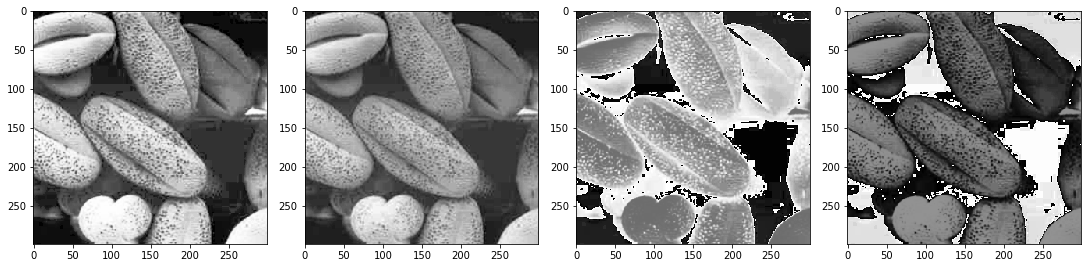

In [5]:
fig, axs = plt.subplots(1, 4, constrained_layout=True, figsize=(15,4))

#Imagen Procesado
axs[0].imshow(img, cmap='gray')

axs[1].imshow(img_realizada, cmap='gray')

axs[2].imshow(img_realizada-img, cmap='gray')

axs[3].imshow(img-img_realizada, cmap='gray')
plt.show()


Esto no es totalmente inesperado porque la diferencia básica entre las imágenes en la columna izquierda es una de contraste, no de contenido. Debido a que las imágenes tienen el mismo contenido, el aumento en el contraste resultante de la ecualización del histograma fue suficiente para hacer que cualquier diferencia de intensidad entre las imágenes ecualizadas sea visualmente indistinguible. Dado el amplio rango de diferencias de contraste en las imágenes originales, este ejemplo ilustra el poder de la ecualización del histograma como una herramienta de mejora de contraste autónoma y adaptativa.

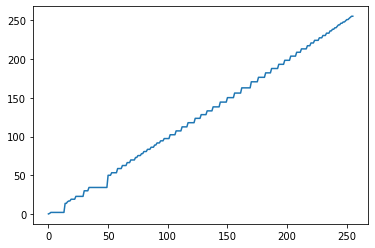

In [6]:
s = 255*CDF(PDF(img.flatten()))
plt.plot(list(map(int,np.linspace(0,255,256))), s)
plt.show()

EJEMPLO 

Supongamos 3 bit ($L = 8$) de tamaño 64x64 pixeles ($MN=4096$) con un rango $[0,7]$

![Probabilidad de p(r) y p(s)](./imagenes/formula_example3_5.png)

![Probabilidad de p(r) y p(s)](./imagenes/tabla_3_1.png)

![Probabilidad de p(r) y p(s)](./imagenes/resultado_tabla_3_5.png)

### Histograma de especificación

En la sección anterior, se explico el histograma de ecualización que produce una función de transformación que busca generar una imagen de salida con un histograma uniforme.

 Cuando se desea la mejora automática, este es un buen enfoque a considerar porque los resultados de esta técnica son predecibles y el método es simple de implementar. Sin embargo, hay aplicaciones en las que la ecualización del histograma no es adecuada. En particular, a veces es útil poder especificar la forma del histograma que deseamos que tenga la imagen procesada. El método utilizado para generar imágenes que tienen un histograma especificado se denomina coincidencia de histograma o especificación de histograma.

![Probabilidad de p(r) y p(s)](./imagenes/tabla_3_2.png)

In [7]:
pdf = PDF(img_nelson.flatten())

In [8]:
Sk = sorted(set(change_s))

In [9]:
aux = 0
j = 0
fraccion = []
for i in Sk:
    while change_s[j] == i and j < 255:
        aux+=1
        j+=1
    #print(i,j,aux)
    fraccion.append(j)
    aux = 0

In [10]:
ini = 0
comprobar = []
for i in fraccion:
    #print(i,"->",sum(pdf[ini:i]))
    comprobar.append(sum(pdf[ini:i]))
    ini = i

In [11]:
new = np.zeros(256)

In [12]:
ans = 255
for i in range(len(comprobar)-1, -1,-1):
    if comprobar[i] != 0.0:
        new[ans] = comprobar[i]
        ans-=1

In [13]:
change_s = list(map(int,255*CDF(new)))
#change_s

In [14]:
for i in range(0,img_g.shape[0]):
    for j in range(0, img_g.shape[1]):
        img_g[i][j] = change_s[img_g[i][j]]

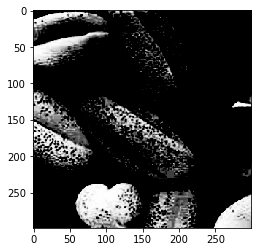

In [15]:
plt.imshow(img_g, cmap='gray')

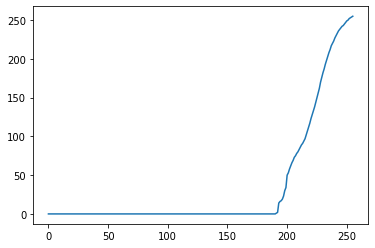

In [16]:
plt.plot(list(map(int,np.linspace(0,255,256))), change_s)
plt.show()

### Procesamiento de Histogramas locales

Muchas veces usar histogramas globales beneficia mucho a los objetos grandes usando una funcipon de transformación en la intensidad de distribución de una imagen entera. El objetivo de este tema es poder determinar objetos pequeños que tienen en menor cantidad valores de intensidades, para resolver este problema se hace un análisis de histograma con sus vecinos del pixel principal.

#### Usando histogramas estadísticos para la mejora de la imagen

- **nth Momento** 
$$\mu_n = \sum_{i=0}^{L-1}({r_i-m})^n p(r_i)$$

- **media**

$$m = \sum_{i=0}^{L-1}r_ip(r_i)$$

In [17]:
def media(pdf):
    return sum(list(map(int,np.linspace(0,255,256))) * pdf)

def momento_n(pdf,n):
    return sum(((list(map(int,np.linspace(0,255,256))) - media(pdf))**n)*pdf)

               

Sea $(x,y)$ las coordenadas de algpun pixel en una imagen, y sea $S_{xy}$ denotado una vecindad de tamaño especifico, centrada en $(x,y)$

El valor *medio* de los pixeles en esta vecindad es dado por la expresión:

$$m_{S_{xy}} = \sum_{i=0}^{L-1}r_ip_{S_{xy}}(r_i)$$

$$\sigma^2_{S_{xy}} = \sum_{i=0}^{L-1}({r_i-m_{S_{xy}}})^2 p_{S_{xy}}(r_i)$$

#### Ejemplo sobre histograma local

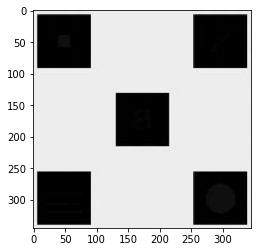

In [18]:
hist_local = cv2.imread("img/figura3_26.png",0)
plt.imshow(hist_local, cmap='gray')

In [19]:
pdf_img = PDF(hist_local.flatten())
desv_g = momento_n(pdf_img,2)
media_g = media(pdf_img)
k0, k1, k2, k3 = 0, 0.32, 0, 0.1
C = 25
g = hist_local.copy()
print(max(hist_local.flatten()))
print(min(hist_local.flatten()))

print(desv_g)
print(np.std(pdf_img))
print(media_g)
print(np.mean(pdf_img))

244
32
7802.109194613639
0.03885533142614882
170.40772946859903
0.00390625


![Probabilidad de p(r) y p(s)](./imagenes/formula_g.png)

In [20]:
for i in range(0,hist_local.shape[0]-2):
    for j in range(0, hist_local.shape[1]-2):
        pdf_l = (PDF(hist_local[i:i+3,j:j+3].flatten()))
        desv_l = momento_n(pdf_l,2)
        media_l = media(pdf_l)
        if k0*media_g <= media_l <= k1*media_g and k2*desv_g <= desv_l <= k3*desv_g:
            g[i][j] = C*hist_local[i][j]

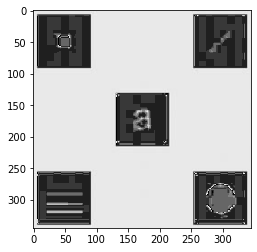

In [21]:
plt.imshow(g,cmap='gray')

## Filtrado espacial

El nombre filtrado es prestado del procesamiento de dominio de frecuecnias y se refiere a pasar, modificar o rechazar las componentes de frecuecnia de la imagen. Si la operación realizada en los píxeles de la imagen es lineal, entonces el filtro se llama filtro espacial lineal. De lo contrario, el filtro es un filtro espacial no lineal. 

![](./imagenes/corr_conv.png)

Para saber si un kernel es separable debemos determinar el rank sea 1, ademas la convolución es conmutativos, asociativos y distribuido.

Rank = Número de vectores independiente que conforman la matrix
Si es 1 entonces un vector es dependiente de otro

El término función de transferencia de filtro se usa para denotar funciones de filtro en el dominio de frecuencia; esto es análogo a nuestro uso del término "núcleo de filtro" en el dominio espacial).

### Filtro espacial - Suavizado (LossPass) o promedio

Se usan para reducir las transiciones bruscas en intensidad. Debido a que el ruido aleatorio generalmente consiste en transiciones bruscas

##### Kerneles de filtro box

Cuyos coeficientes tienen el mismo valor, tipicamente es 1. Es normalizado por la suma de todos sus coeficientes.

La normalización tiene dos papeles muy importantes: Primero, el valor promedio de un área de intensidad constante sería igual a esa intensidad en la imagen filtrada, como debería. En segundo lugar, la normalización del núcleo de esta manera evita la introducción de un sesgo durante el filtrado; es decir, la suma de los píxeles en las imágenes originales y filtradas será la misma.

##### Kerneles de filtro gaussiano

Los filtros de caja son adecuados para una experimentación rápida y a menudo producen resultados de suavizado que son visualmente aceptables. También son útiles cuando se desea reducir el efecto de suavizado en los bordes. Sin embargo, los filtros de caja tienen limitaciones que los hacen malas elecciones en muchas aplicaciones. Por ejemplo, una lente desenfocada a menudo se modela como un filtro de paso bajo, pero los filtros de caja son aproximaciones deficientes a las características de desenfoque de las lentes. Otra limitación es el hecho de que los filtros de caja favorecen el desenfoque en direcciones perpendiculares.

En aplicaciones que involucran imágenes con un alto nivel de detalle o con fuertes componentes geométricos, la direccionalidad de los filtros de caja a menudo produce resultados indeseables.

*circularmente simétrica* (también llamada **isotrópica**, lo que significa que su respuesta es independiente de la orientación)

$$w(s,t) = G(s, t) = K e^{-\frac{s^2 + t^2}{2\sigma^2}}$$

Recordemos que s controla la "propagación" de una función gaussiana sobre su media

Las variables $s$ y $t$ son valores discretos, dejamos que $r = [s^2 + t^2]^{1/2}$

$$G(r) = Ke^{-\frac{r^2}{2\sigma^2}}$$

Los pequeños núcleos gaussianos no pueden capturar la característica forma de campana gaussiana y, por lo tanto, se comportan más como núcleos de caja. Como discutimos a continuación, un tamaño práctico para los núcleos gaussianos es del orden de $\lceil{6}\sigma\rceil$ a $\lceil{6}\sigma\rceil$.

![](./imagenes/figure3_35.png)

Este úlitmo kernel suaviza los bornes acomparación con el filtro box

Usaríamos este tipo de filtro cuando se desea menos suavizado de bordes. Por el contrario, el filtro gaussiano produjo resultados significativamente más suaves alrededor de las transiciones de borde. Usaríamos este tipo de filtro cuando generalmente se desea un alisado uniforme.

### Padding
Existen 3 tipos:
- Zero : border con valores 0
- mirror : llamado simétrico , fuera del límite de la imagen se obtienen reflejando la imagen a través de su borde (las áreas cercanas al borde contienen detalles de la imagen)
- replicate : Los valores fuera del límite se establecen iguales al valor del borde de la imagen más cercano (Bordes constantes)

### Corrección de sombreado

El filtrado de paso bajo es un método simple y resistente para estimar patrones de sombreado

Tener en cuenta que mejor es trabajar con kernel separable para reducir el tiempo de complejidad

# FILTROS ESTADÍSTICOS DE ORDEN (NO LINEALES)

Los filtros de estadísticas de orden son filtros espaciales no lineales cuya respuesta se basa en ordenar (clasificar) los píxeles contenidos en la región abarcada por el filtro. El suavizado se logra al reemplazar el valor del píxel central con el valor determinado por el resultado de la clasificación. El filtro más conocido en esta categoría es el filtro mediano, que, como su nombre lo indica, reemplaza el valor del píxel central por la mediana de los valores de intensidad en la vecindad de ese píxel (el valor del píxel central se incluye en computando la mediana). Los filtros medianos proporcionan excelentes capacidades de reducción de ruido para ciertos tipos de ruido aleatorio, con mucho menos desenfoque que los filtros de suavizado lineal de tamaño similar. Los filtros medianos son particularmente efectivos en presencia de ruido de impulso (a veces llamado ruido de sal y pimienta, cuando se manifiesta como puntos blancos y negros superpuestos en una imagen).

La función principal de los filtros de mediana es forzar los puntos para que sean más como sus vecinos. Los grupos aislados de píxeles que son claros u oscuros con respecto a sus vecinos, y cuya área es menor que $m^2/2$(la mitad del área del filtro), son forzados por un filtro de $mxm$ mediana para tener el valor de la intensidad media de la píxeles en el vecindario 

El **filtro mediana** representa el percentil 50 de un conjunto de números clasificados, pero la clasificación se presta a muchas otras posibilidades. Por ejemplo, usar el percentil 100 da como resultado el llamado **filtro máximo**, que es útil para encontrar los puntos más brillantes en una imagen o para erosionar áreas oscuras adyacentes a regiones claras.

## Filtro espacio (Highpass) Paso Alto

las frecuencias altas (que son responsables de los detalles finos), mientras que las bajas se atenúan o se rechazan.

Sin embargo, requerimos que cualquier definición que usemos para una primera derivada:

1. Debe ser cero en áreas de intensidad constante.
2. Debe ser distinto de cero al inicio de un escalón o rampa de intensidad.
3. Debe ser distinto de cero a lo largo de las rampas de intensidad.

Operación "anticipada" 

$$\frac{df}{dx} = f(x+1) - f(x)$$

Para la segunda derivada:

1. Debe ser cero en áreas de intensidad constante
2. Debe ser distinto de cero al inicio y al final de un escalón o rampa de intensidad.
3. Debe ser cero a lo largo de las rampas de intensidad

$$\frac{\partial^2 f}{\partial x^2} = f(x + 1) + f(x - 1) - 2f(x)$$

# Laplaciano

Aquí estamos interesados en los núcleos isotrópicos, cuya respuesta es independiente de la dirección de las discontinuidades de intensidad en la imagen a la que se aplica el filtro.

La función de la imagen $f(x, y)$ de dos variables, se define como : $$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$-

Para expresar esta ecuacipon en forma discreta usamos la definición anterior. En la direccion X , tenemos : $$\frac{\partial^2 f}{\partial x^2} = f(x + 1,y) + f(x - 1,y) - 2f(x,y)$$ y , similarmente en la dirección Y, tenemos :$$\frac{\partial^2 f}{\partial y^2} = f(x,y + 1) + f(x,y - 1) - 2f(x,y)$$

Entonces : $$\nabla^2 f = f(x + 1,y) + f(x - 1,y) + f(x,y + 1) + f(x,y - 1) - 4f(x,y)$$

![](./imagenes/figura3_45.png)

El operador Laplaciano, resalta las transiciones de intensidad nítidas en una imagen y enfatiza las regiones de intensidades que varían lentamente. Esto tenderá a producir imágenes que tienen líneas de borde grisáceas y otras discontinuidades, todas superpuestas sobre un fondo oscuro y sin rasgos distintivos. Si la definición utilizada tiene un coeficiente central negativo, restamos la imagen laplaciana del original para obtener un resultado más nítido.

El enfoque básico para una imagen es : $$g(x, y) = f(x, y) + c [\nabla^2 f(x, y)]$$

donde c varía entre 1 y -1. Este depende de lo que quieres extraer, generalmente es -1 para extraer los contorno y establecer la nítidez de la imagen

La imagen laplaciana contiene valores positivos y negativos, y la pantalla recorta todos los valores negativos en 0

** Kernel derivado - filtro alto

** Kernel suavizado - filtro bajo